In [1]:
from utils import Dataset, init_notebook
init_notebook()
ds = Dataset.from_sheets()

Replacing outliers with na


In [2]:
len(ds.df)

20

Długość skrzydła P (cm) female: mean=31.46, std=0.63, cv=0.02
Długość skrzydła P (cm) male: mean=32.73, std=0.86, cv=0.03
t-test Długość skrzydła P (cm) by gender: pvalue=0.00
Saving plot to 'images/Długość skrzydła P (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Długość skrzydła P (cm)'>

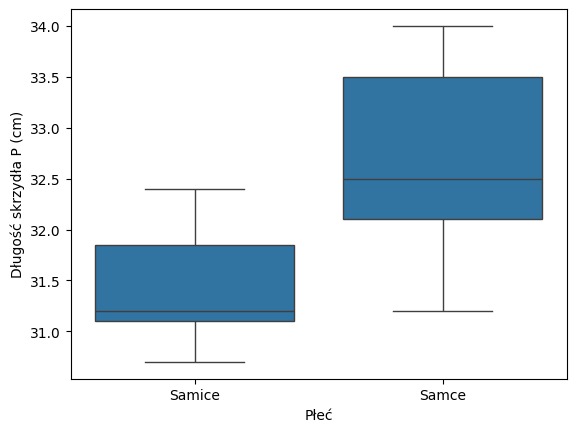

In [3]:
ds.compare_by_gender(x="Długość skrzydła P (cm)")

Saving plot to 'images/All corelations both genders.png'


<Axes: >

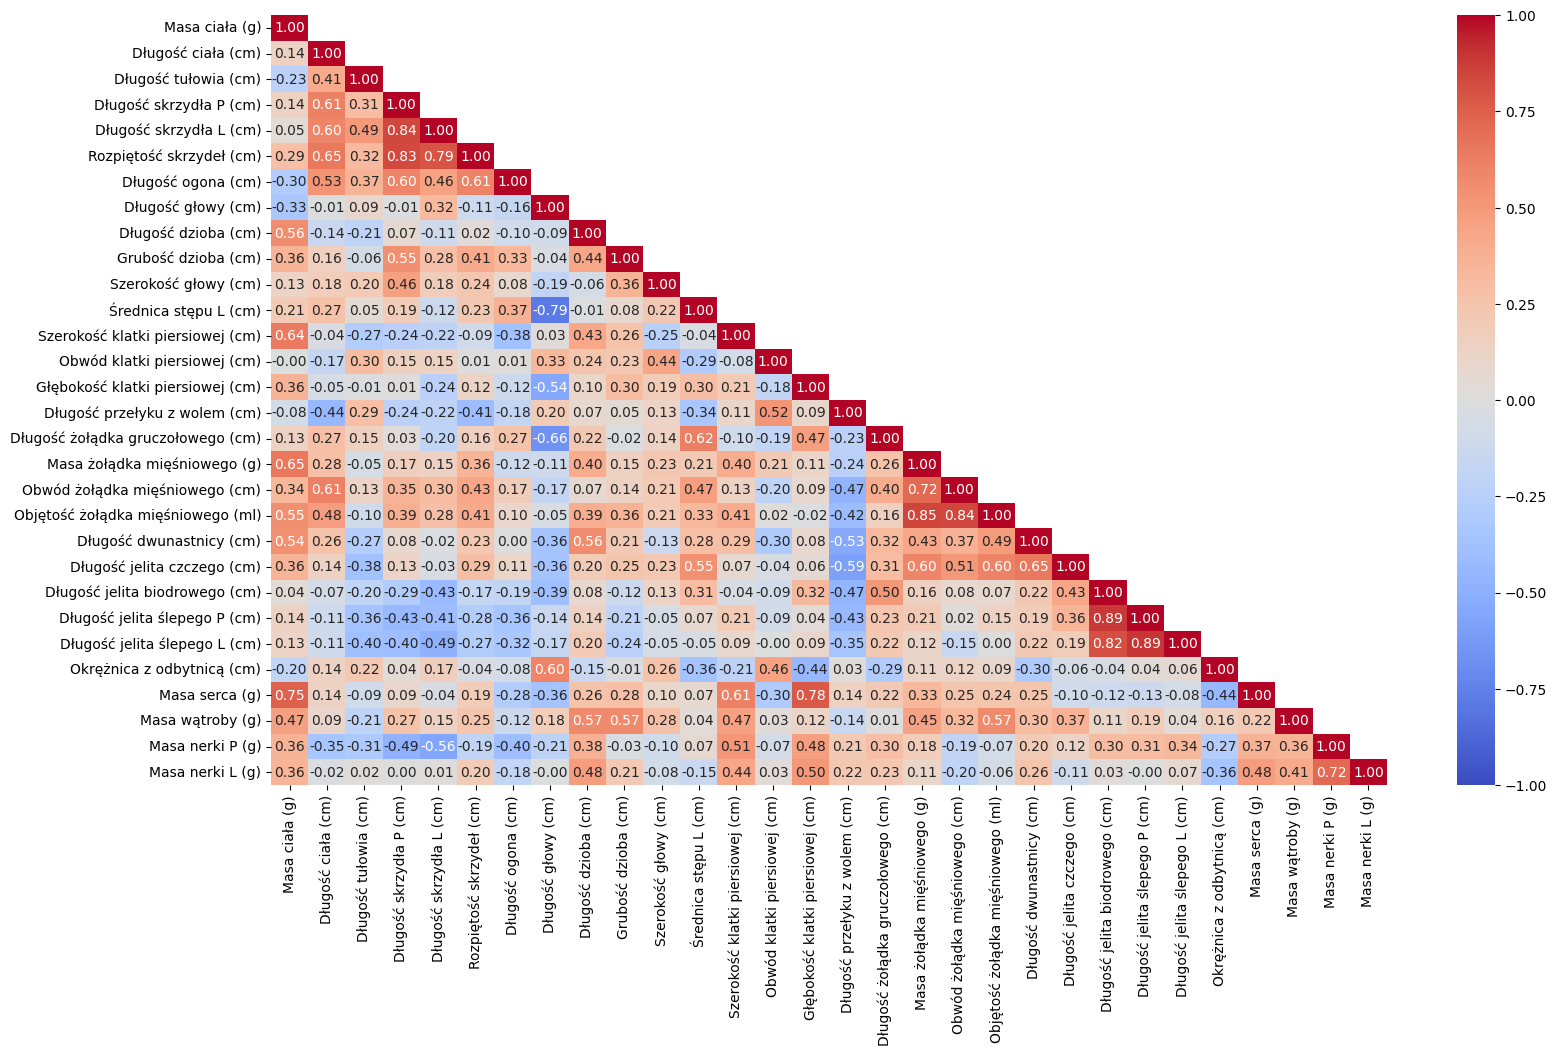

In [4]:
ds.corr_heatmap(ds.data_cols, ds.data_cols,"All corelations both genders")

Saving plot to 'images/All corelations Samice.png'


<Axes: >

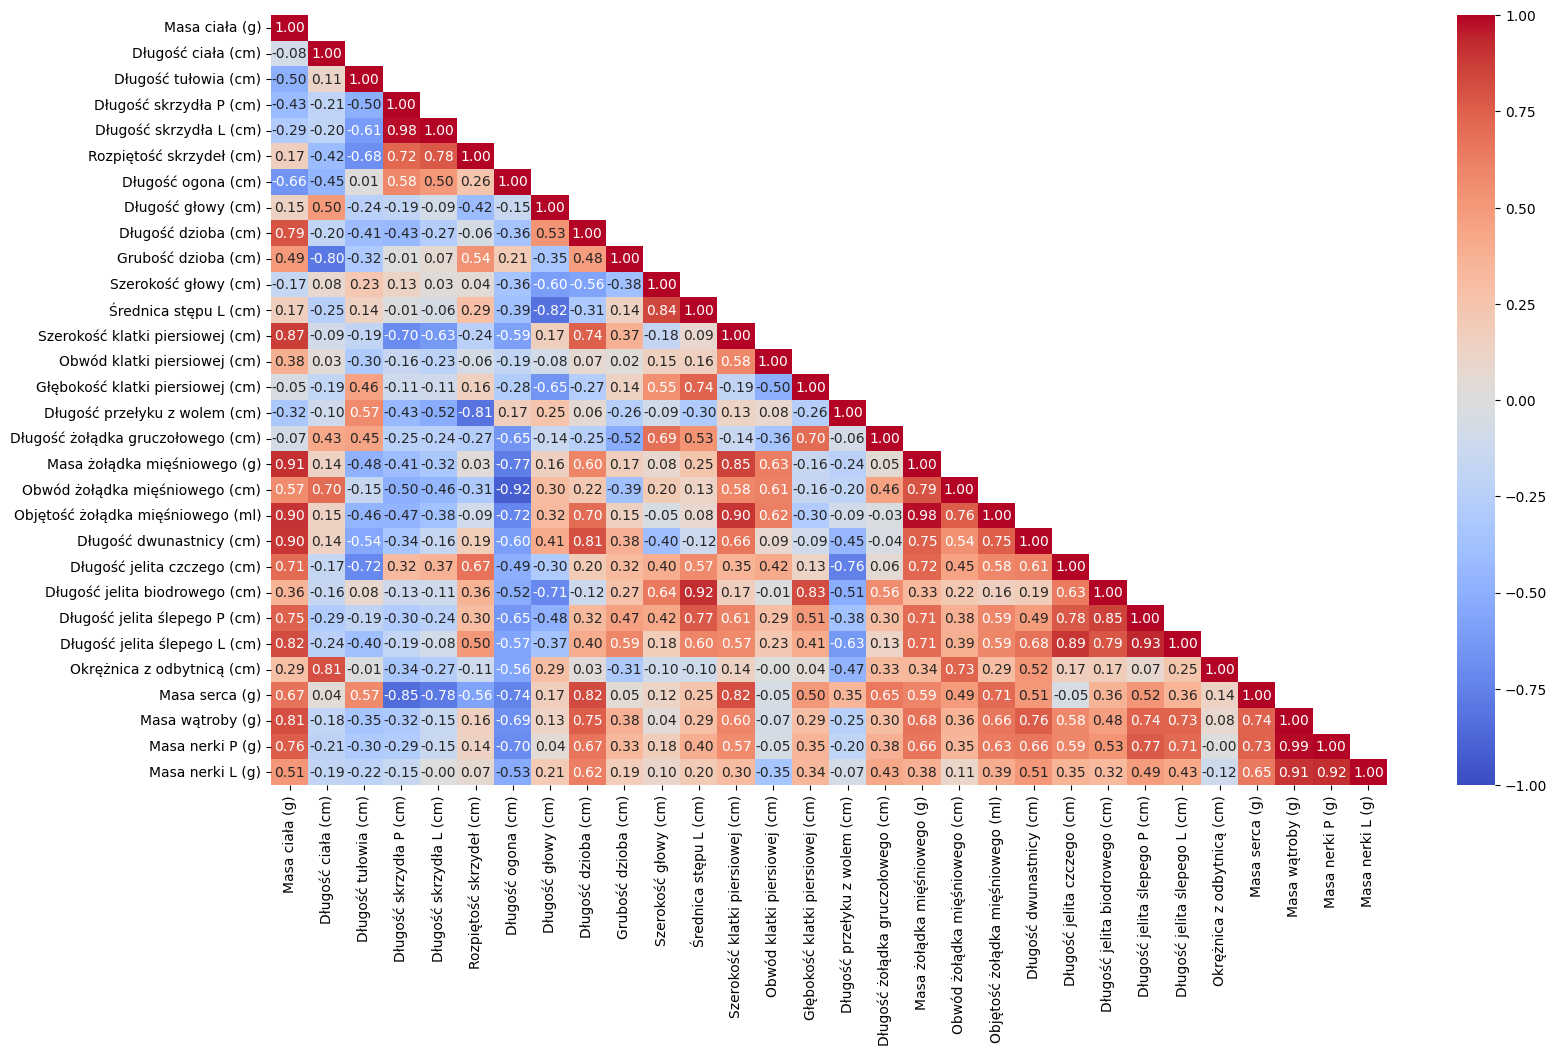

In [5]:
ds.corr_heatmap(ds.df["Płeć"] == "Samice", ds.data_cols,"All corelations Samice")

Saving plot to 'images/All corelations Samce.png'


<Axes: >

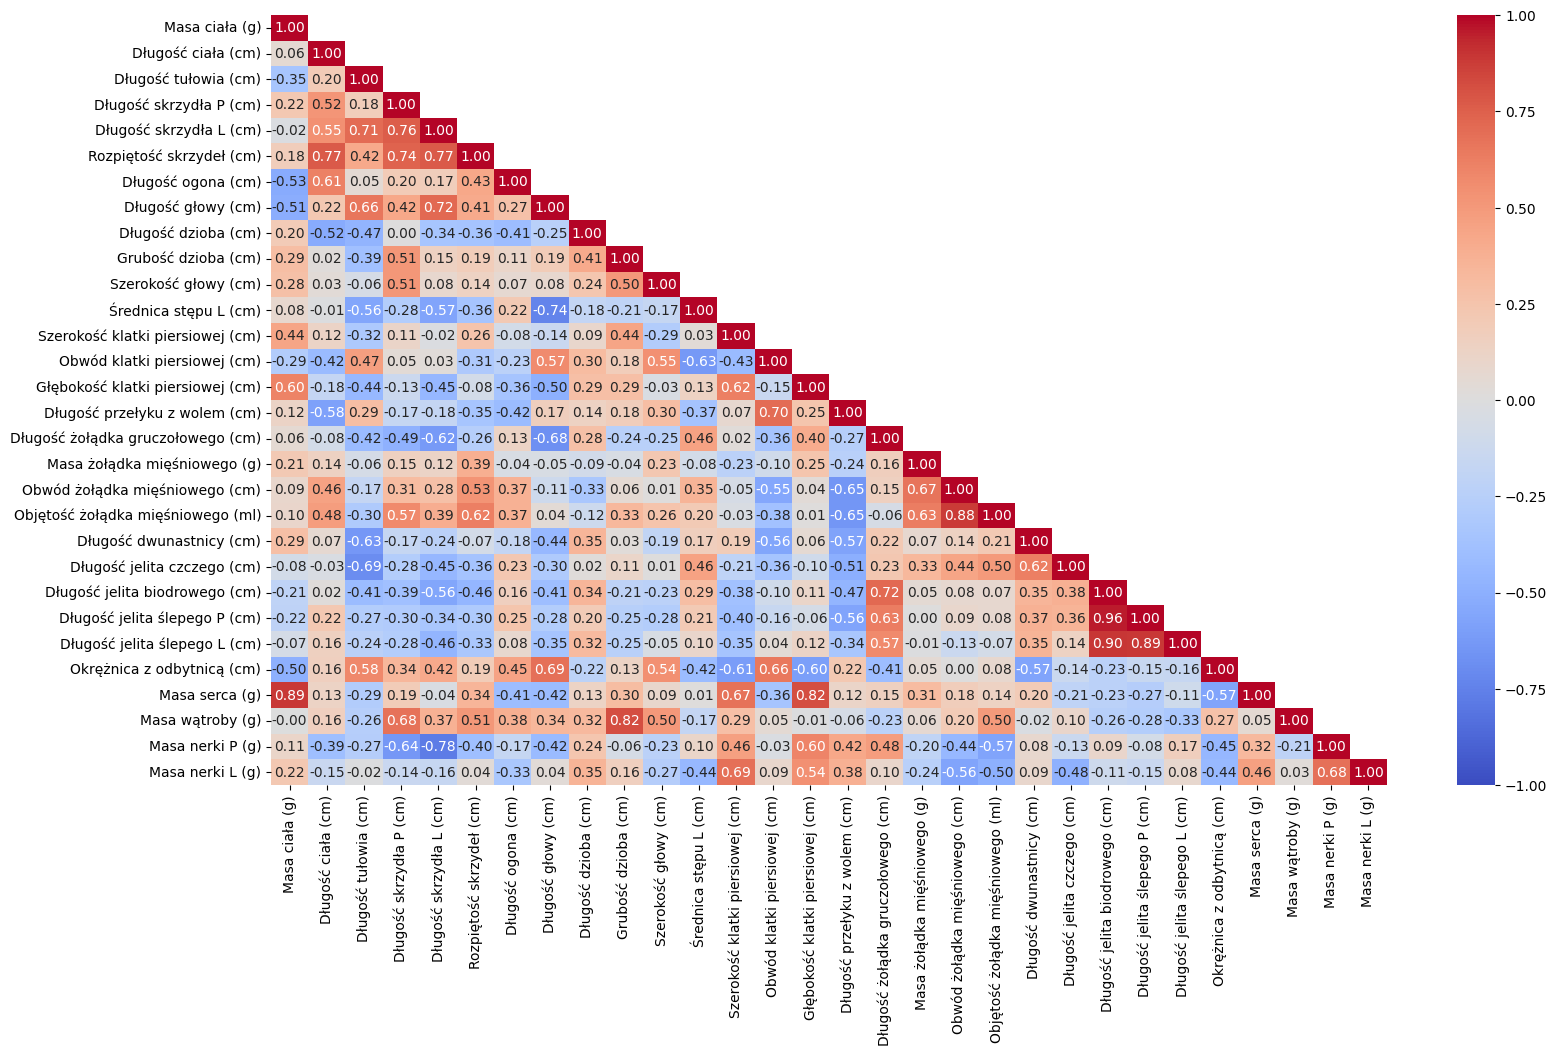

In [6]:
ds.corr_heatmap(ds.df["Płeć"] == "Samce", ds.data_cols,"All corelations Samce")

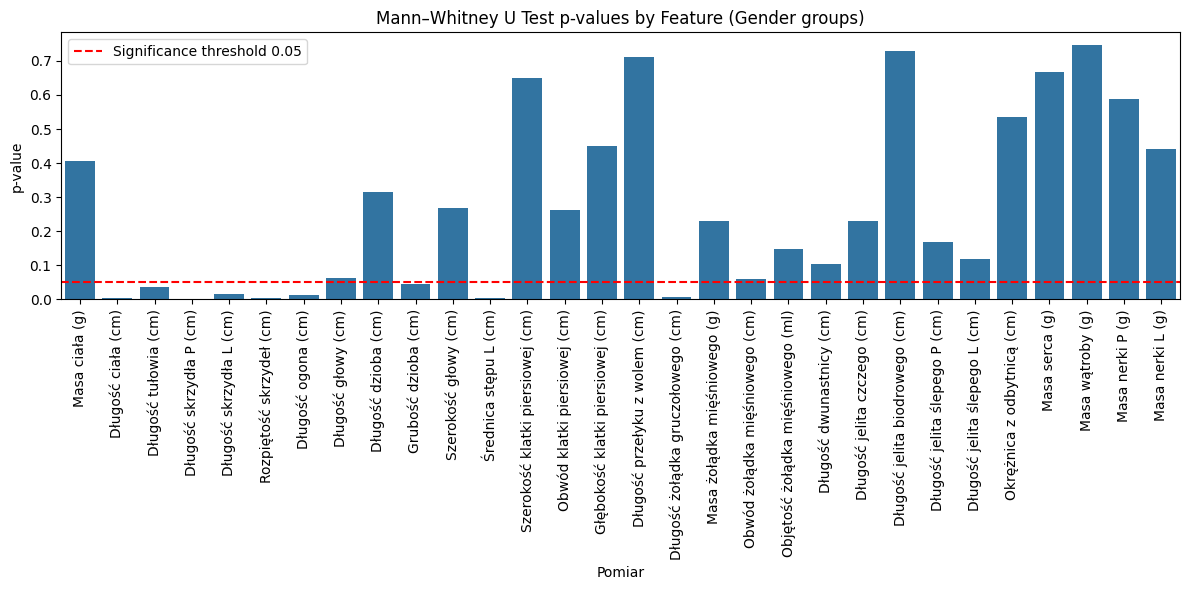

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, shapiro, ttest_ind
import numpy as np

# Assuming df: rows=samples, columns=features
# gender: Series aligned with df.index, values 'male'/'female'

# pvals = []
# normality1 = []
# normality2 = []
# features = []

def format(series: pd.Series):
    return f"{series.mean():.2f} ± {series.std():.2f}"

results = []

df = ds.df.copy()
for col in ds.data_cols:
    group1 = df[df["Płeć"] == "Samice"][col].dropna()
    group2 = df[df["Płeć"] == "Samce"][col].dropna()

    if len(group1) > 0 and len(group2) > 0:
        _, p = ttest_ind(group1, group2, alternative="two-sided", equal_var=False)
    else:
        p = None
    if isinstance(p, list):
        p = p[0]

    results.append(
        {
            "Pomiar": col,
            "Razem (Średnia ± SD)": format(df[col]),
            "Samice (Średnia ± SD)": format(group1),
            "Samce (Średnia ± SD)": format(group2),
            "Shapiro Samice": shapiro(group1).pvalue,
            "Shapiro Samce": shapiro(group2).pvalue,
            "t-test pvalue": p,
        }
    )

pvals_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Pomiar", y="t-test pvalue", data=pvals_df)
plt.xticks(rotation=90)
plt.ylabel("p-value")
plt.title("Mann–Whitney U Test p-values by Feature (Gender groups)")
plt.axhline(0.05, color="red", linestyle="--", label="Significance threshold 0.05")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
pvals_df

,Pomiar,Razem (Średnia ± SD),Samice (Średnia ± SD),Samce (Średnia ± SD),Shapiro Samice,Shapiro Samce,t-test pvalue
0,Masa ciała (g),311.19 ± 73.87,288.91 ± 93.80,323.19 ± 61.62,0.600938,0.963938,0.406640
1,Długość ciała (cm),37.33 ± 1.39,36.31 ± 0.67,37.88 ± 1.38,0.924601,0.033972,0.003108
2,Długość tułowia (cm),13.25 ± 1.09,12.49 ± 1.13,13.66 ± 0.84,0.757926,0.755176,0.036930
3,Długość skrzydła P (cm),32.29 ± 0.99,31.46 ± 0.63,32.73 ± 0.86,0.401606,0.550950,0.001598
4,Długość skrzydła L (cm),32.21 ± 1.10,31.54 ± 0.55,32.59 ± 1.17,0.370949,0.337990,0.017075
5,Rozpiętość skrzydeł (cm),68.68 ± 2.27,66.81 ± 1.90,69.77 ± 1.72,0.824742,0.338671,0.005580
6,Długość ogona (cm),12.28 ± 0.70,11.67 ± 0.71,12.60 ± 0.44,0.389195,0.949977,0.012597
7,Długość głowy (cm),7.25 ± 0.37,7.43 ± 0.24,7.15 ± 0.39,0.213070,0.655117,0.062742
8,Długość dzioba (cm),1.91 ± 0.16,1.85 ± 0.21,1.94 ± 0.13,0.752652,0.426909,0.314368
9,Grubość dzioba (cm),0.62 ± 0.06,0.59 ± 0.03,0.63 ± 0.06,0.851753,0.665247,0.045296


In [9]:
pvals_df.to_excel("pvals.xlsx")

<Axes: >

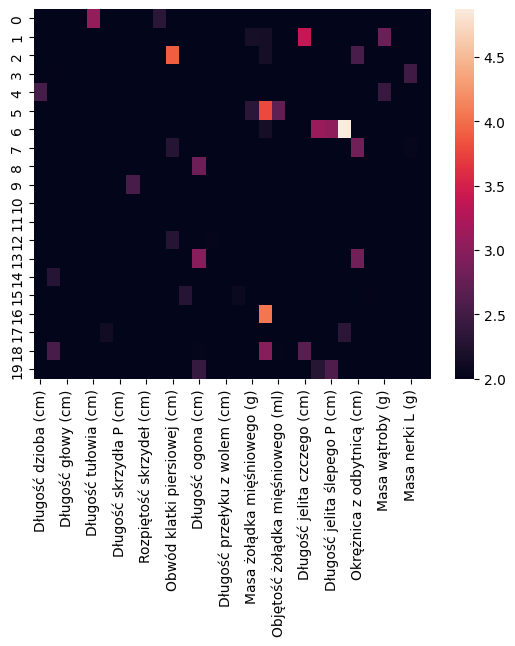

In [10]:
def modified_z_score(series):
    series = series.copy().fillna(series.mean())
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    if mad == 0:
        return np.zeros(len(series))  # Avoid division by zero
    return 0.6745 * (series - median) / mad

# Apply to all numeric columns
z_scores = df.select_dtypes(include=[np.number]).apply(modified_z_score)
outliers = (np.abs(z_scores) > 3.5)
sns.heatmap(z_scores.abs(), vmin=2)

In [11]:

# Get only columns where at least one outlier exists
columns_with_outliers = outliers.any(axis=0)

# Filter dataframe to show only rows and columns where outliers occurred
filtered_df = z_scores.loc[outliers.any(axis=1), columns_with_outliers]
filtered_df

,Obwód klatki piersiowej (cm),Obwód żołądka mięśniowego (cm),Długość jelita ślepego L (cm)
2,3.901723,-2.1584,0.281662
5,-1.452769,-3.7772,0.709394
6,-0.311308,2.1584,-4.871957
16,-0.311308,4.0470,0.808101


In [12]:
def outlier_indeces(df, zscore=3.5):
    z_scores = df.select_dtypes(include=[np.number]).apply(modified_z_score)
    outliers = (np.abs(z_scores) > 3.5)
    return outliers


df[outlier_indeces(df)] = pd.NA
df

,Długość dzioba (cm),Grubość dzioba (cm),Długość głowy (cm),Szerokość głowy (cm),Długość tułowia (cm),Długość ciała (cm),Długość skrzydła P (cm),Długość skrzydła L (cm),Rozpiętość skrzydeł (cm),Szerokość klatki piersiowej (cm),...,Długość jelita biodrowego (cm),Długość jelita ślepego P (cm),Długość jelita ślepego L (cm),Okrężnica z odbytnicą (cm),Masa serca (g),Masa wątroby (g),Masa nerki P (g),Masa nerki L (g),Płeć,Masa ciała (g)
0,2.200,0.614,7.7,1.719,10.50,36.0,31.5,31.7,67.6,6.740,...,0.4500,0.660,0.660,5.61,NaN,9.85,1.27,1.22,Samice,422.00
1,1.772,0.580,7.5,1.773,14.10,36.2,31.0,31.0,64.0,5.167,...,0.3300,0.357,0.426,5.10,3.99,3.66,0.66,0.68,Samice,180.00
2,1.859,0.641,7.7,2.097,14.70,37.5,32.0,32.0,68.0,4.737,...,0.6060,0.493,0.580,9.10,2.64,7.09,1.18,1.31,Samce,238.00
3,2.018,0.709,7.8,1.919,14.20,38.2,34.0,34.0,72.0,6.043,...,0.4570,0.346,0.380,5.45,4.90,10.26,1.01,1.73,Samce,292.00
4,1.550,0.538,7.5,2.040,12.00,37.3,32.2,32.1,67.2,4.121,...,0.5300,0.433,0.508,7.40,3.24,4.22,0.74,0.73,Samice,194.00
5,1.760,0.625,7.2,1.858,12.00,35.4,32.4,32.4,70.0,4.015,...,0.7120,0.577,0.619,4.73,3.37,6.97,1.00,1.07,Samice,228.00
6,1.756,0.644,7.4,2.115,14.02,38.0,33.0,33.5,72.0,5.272,...,0.1124,0.102,NaN,6.80,4.70,8.97,0.99,1.01,Samce,344.00
7,1.964,0.613,7.4,2.240,15.00,38.0,34.0,34.0,70.8,4.034,...,NaN,NaN,NaN,9.50,3.10,8.39,0.55,0.59,Samce,298.00
8,1.949,0.563,7.6,2.024,13.10,36.5,31.2,31.4,65.2,5.204,...,0.6800,0.630,0.570,5.70,4.75,10.47,1.41,1.59,Samice,282.00
9,1.879,0.604,7.5,1.961,14.30,39.5,33.5,34.6,71.0,5.034,...,0.5330,0.543,0.537,5.30,4.17,6.89,0.60,1.21,Samce,368.00


<Figure size 1800x1000 with 0 Axes>

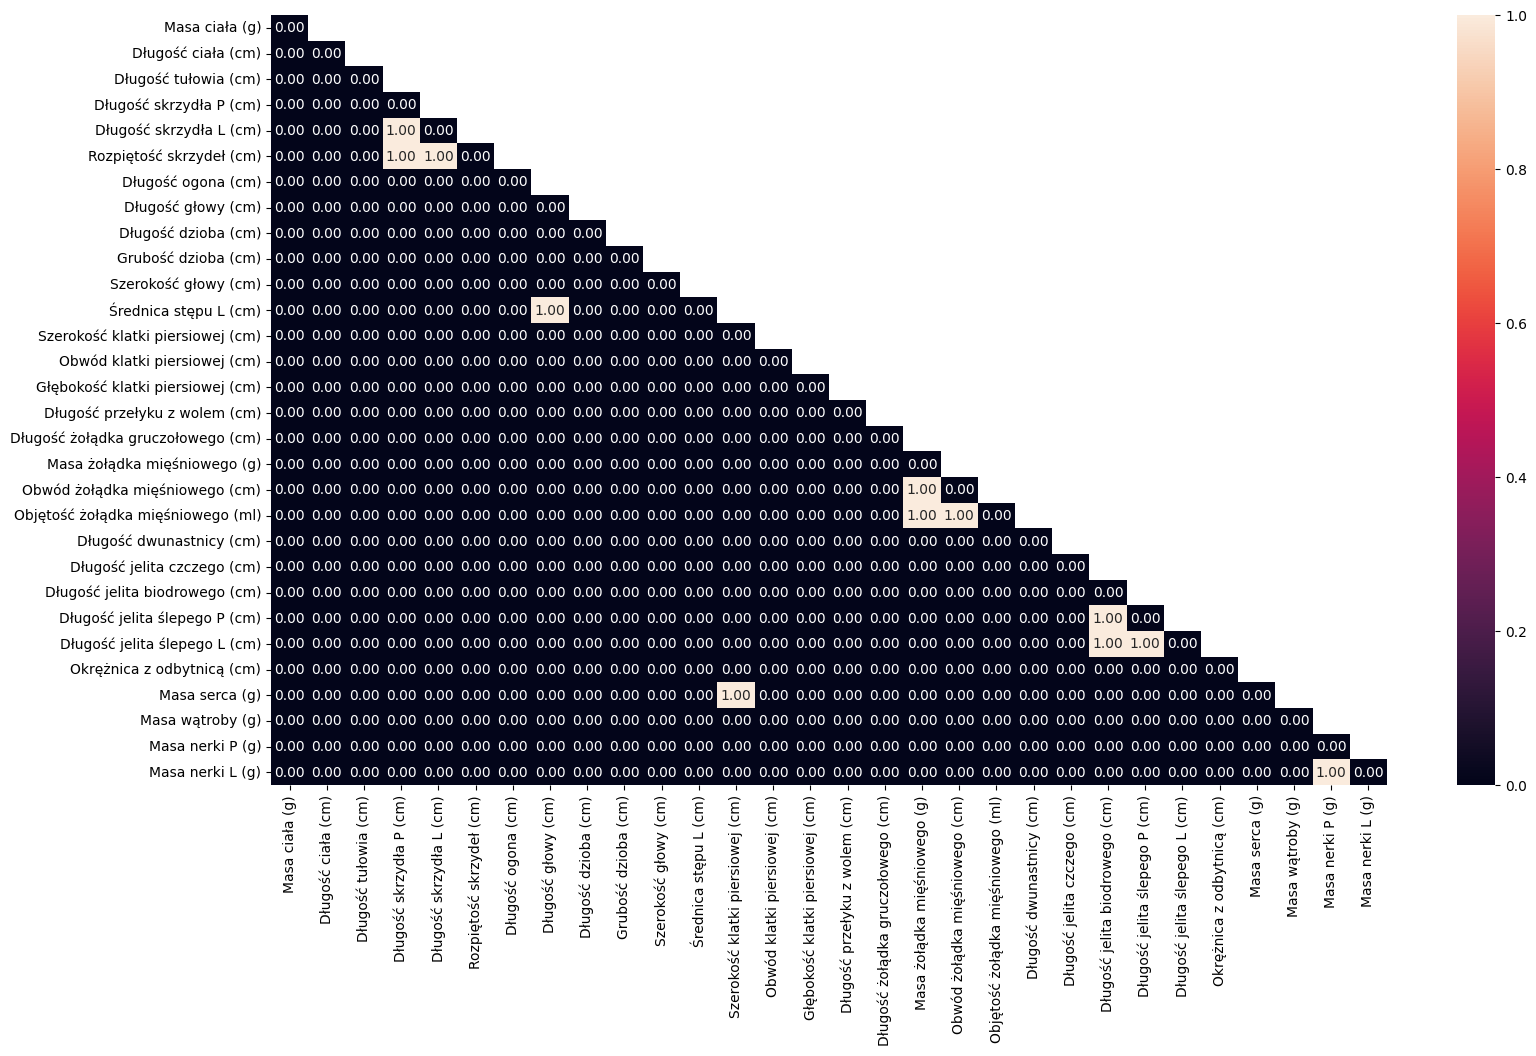

In [ ]:
from scipy.stats import pearsonr

filter = df["Płeć"] == "Samice"

plt.figure(figsize=(18, 10))
cols = ds.data_cols
df_f = ds.df[filter][cols]

# Compute correlation and p-values
corr = df_f.corr(numeric_only=True, method='pearson')
pvals_f = df_f.corr(method=lambda x, y: pearsonr(x, y)[1])

filter = df["Płeć"] == "Samce"

plt.figure(figsize=(18, 10))
cols = ds.data_cols
df_m = ds.df[filter][cols]

# Compute correlation and p-values
corr = df_m.corr(numeric_only=True, method='pearson')
pvals_m = df_m.corr(method=lambda x, y: pearsonr(x, y).pvalue)


ones = np.ones_like(corr)
mask = ones - np.tril(ones) 

# Heatmap of p-values
g = sns.heatmap(
    ((pvals_f[cols] + pvals_m[cols]) / 2 ) < 0.05,
    annot=True,
    mask=mask,
    fmt=".2f",
    # cmap="coolwarm_r",  # red = low p = more significant
    square=False,
    vmin=0,
    vmax=1,
)

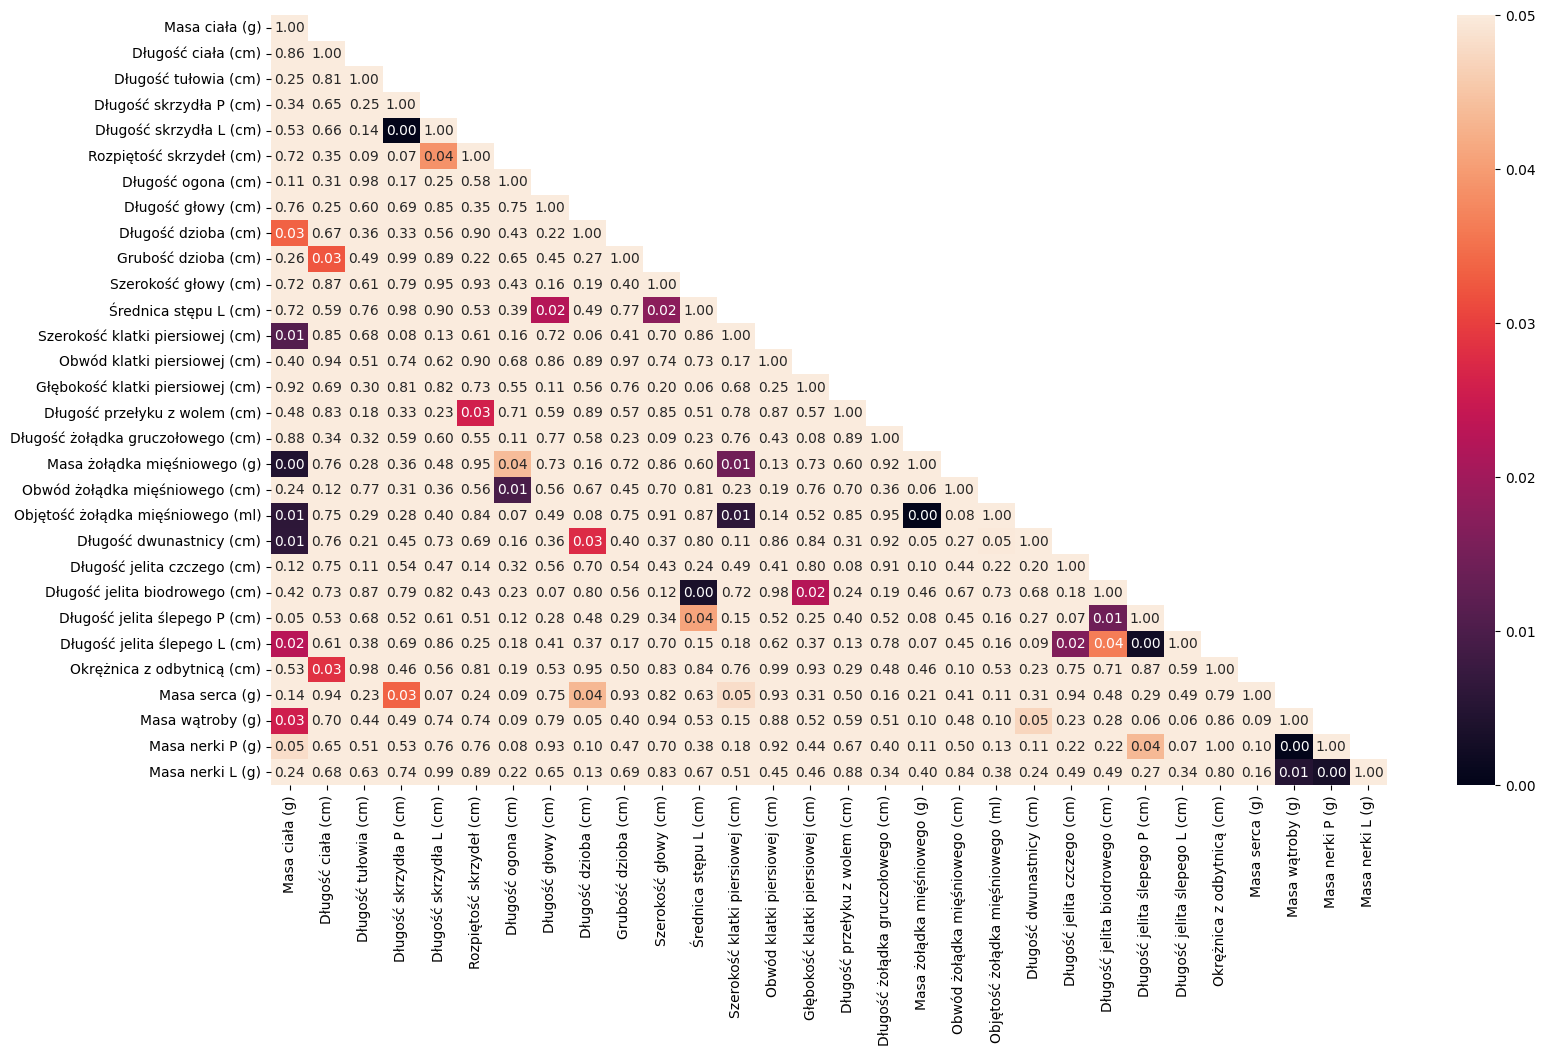

In [35]:
plt.figure(figsize=(18, 10))

g = sns.heatmap(
    pvals_f[cols],
    annot=True,
    mask=mask,
    fmt=".2f",
    # cmap="coolwarm_r",  # red = low p = more significant
    square=False,
    vmin=0,
    vmax=0.05,
)

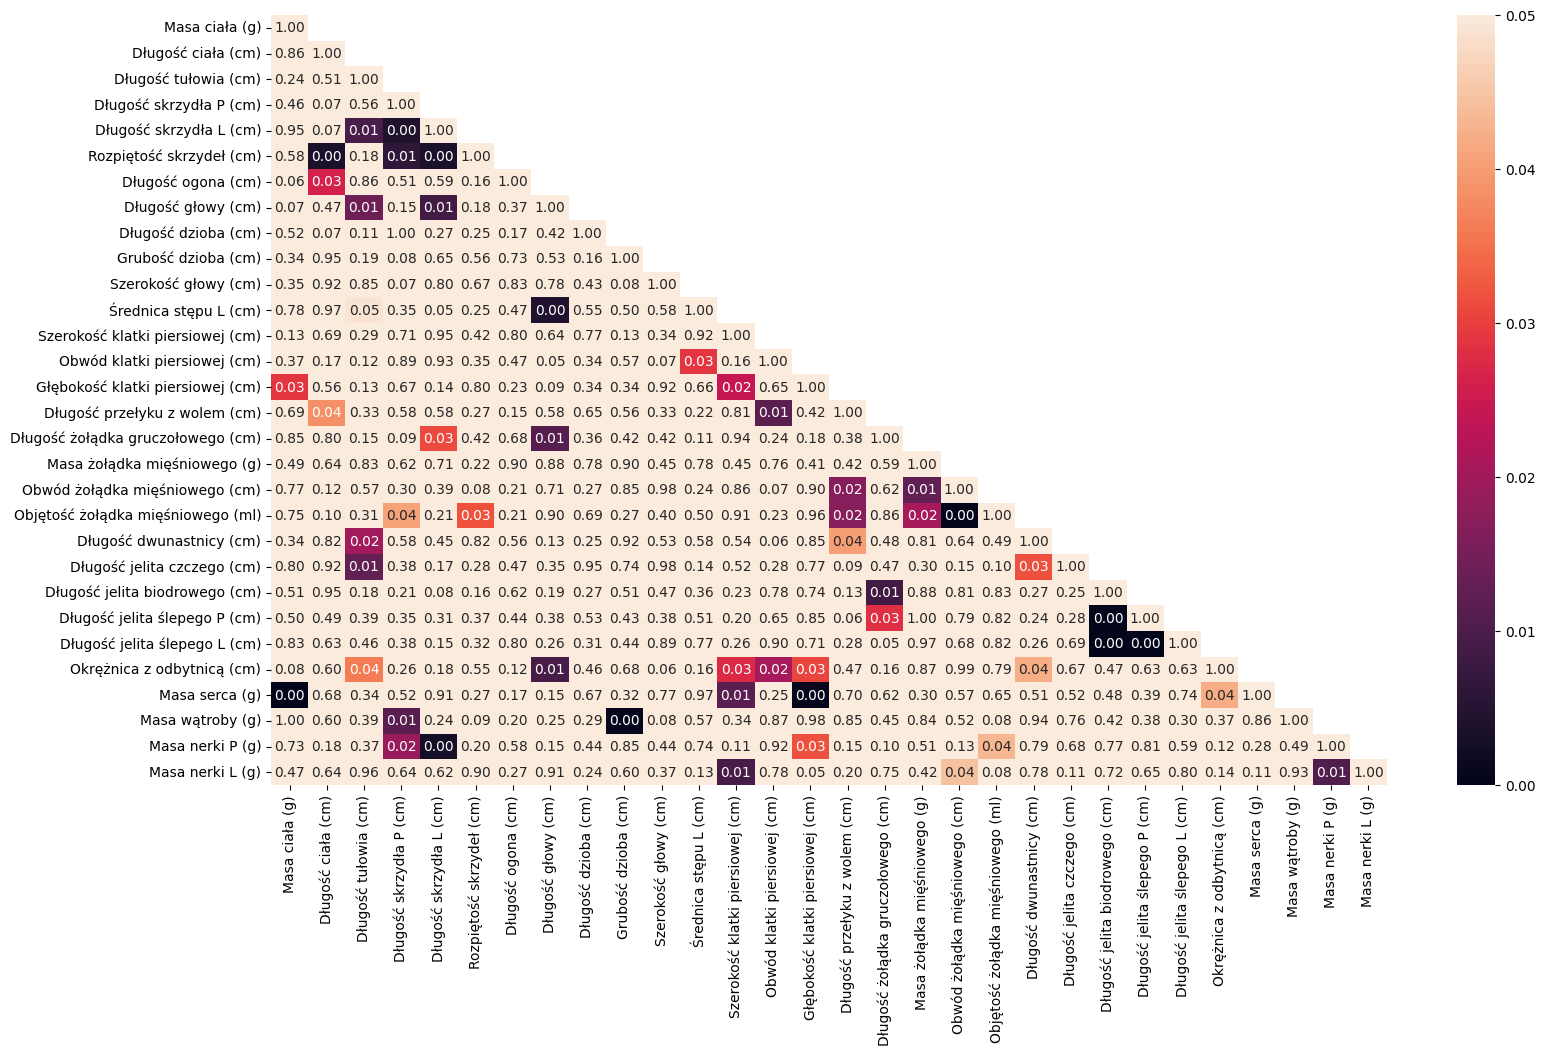

In [32]:
plt.figure(figsize=(18, 10))

g = sns.heatmap(
    pvals_m[cols],
    annot=True,
    mask=mask,
    fmt=".2f",
    # cmap="coolwarm_r",  # red = low p = more significant
    square=False,
    vmin=0,
    vmax=0.05,
)

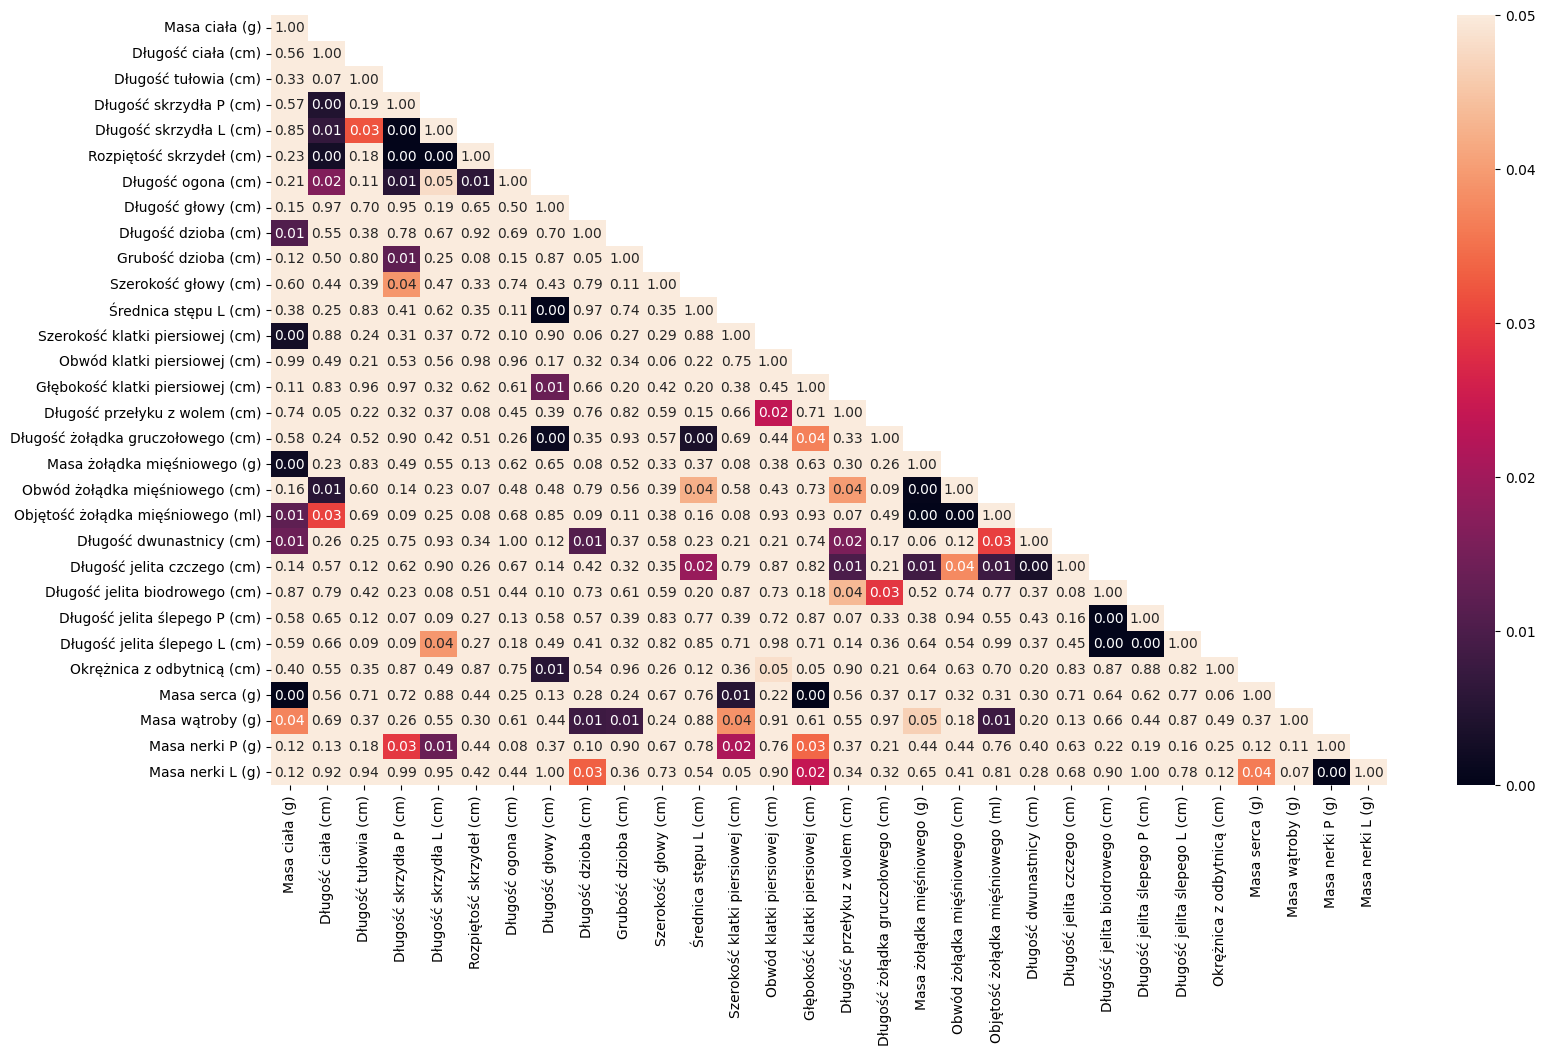

In [30]:
cols = ds.data_cols
dfa = ds.df[cols]

# Compute correlation and p-values
corr = dfa.corr(numeric_only=True, method='pearson')
pvals = dfa.corr(method=lambda x, y: pearsonr(x, y)[1])
plt.figure(figsize=(18, 10))


ones = np.ones_like(corr)
mask = ones - np.tril(ones) 

# Heatmap of p-values
g = sns.heatmap(
    pvals,
    annot=True,
    mask=mask,
    fmt=".2f",
    # cmap="coolwarm_r",  # red = low p = more significant
    square=False,
    vmin=0,
    vmax=0.05,
)